In [2]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract as pyt
%matplotlib inline

In [3]:
def img_bw_data(imgpath):
    # type: (object) -> object
    img = Image.open(imgpath)
    img_bw = img.convert('L')
    pixels_array = np.where(np.asarray(img_bw) > 255/2, 0, 1)
    return pixels_array

In [5]:
imgpath = '/Users/hechengwang/Files/5388ccaf-6309-413b-89e0-a4c600368eec.png'
datapath = '/Users/hechengwang/Files/listOfFields.csv'

In [6]:
im = cv2.imread(imgpath)
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

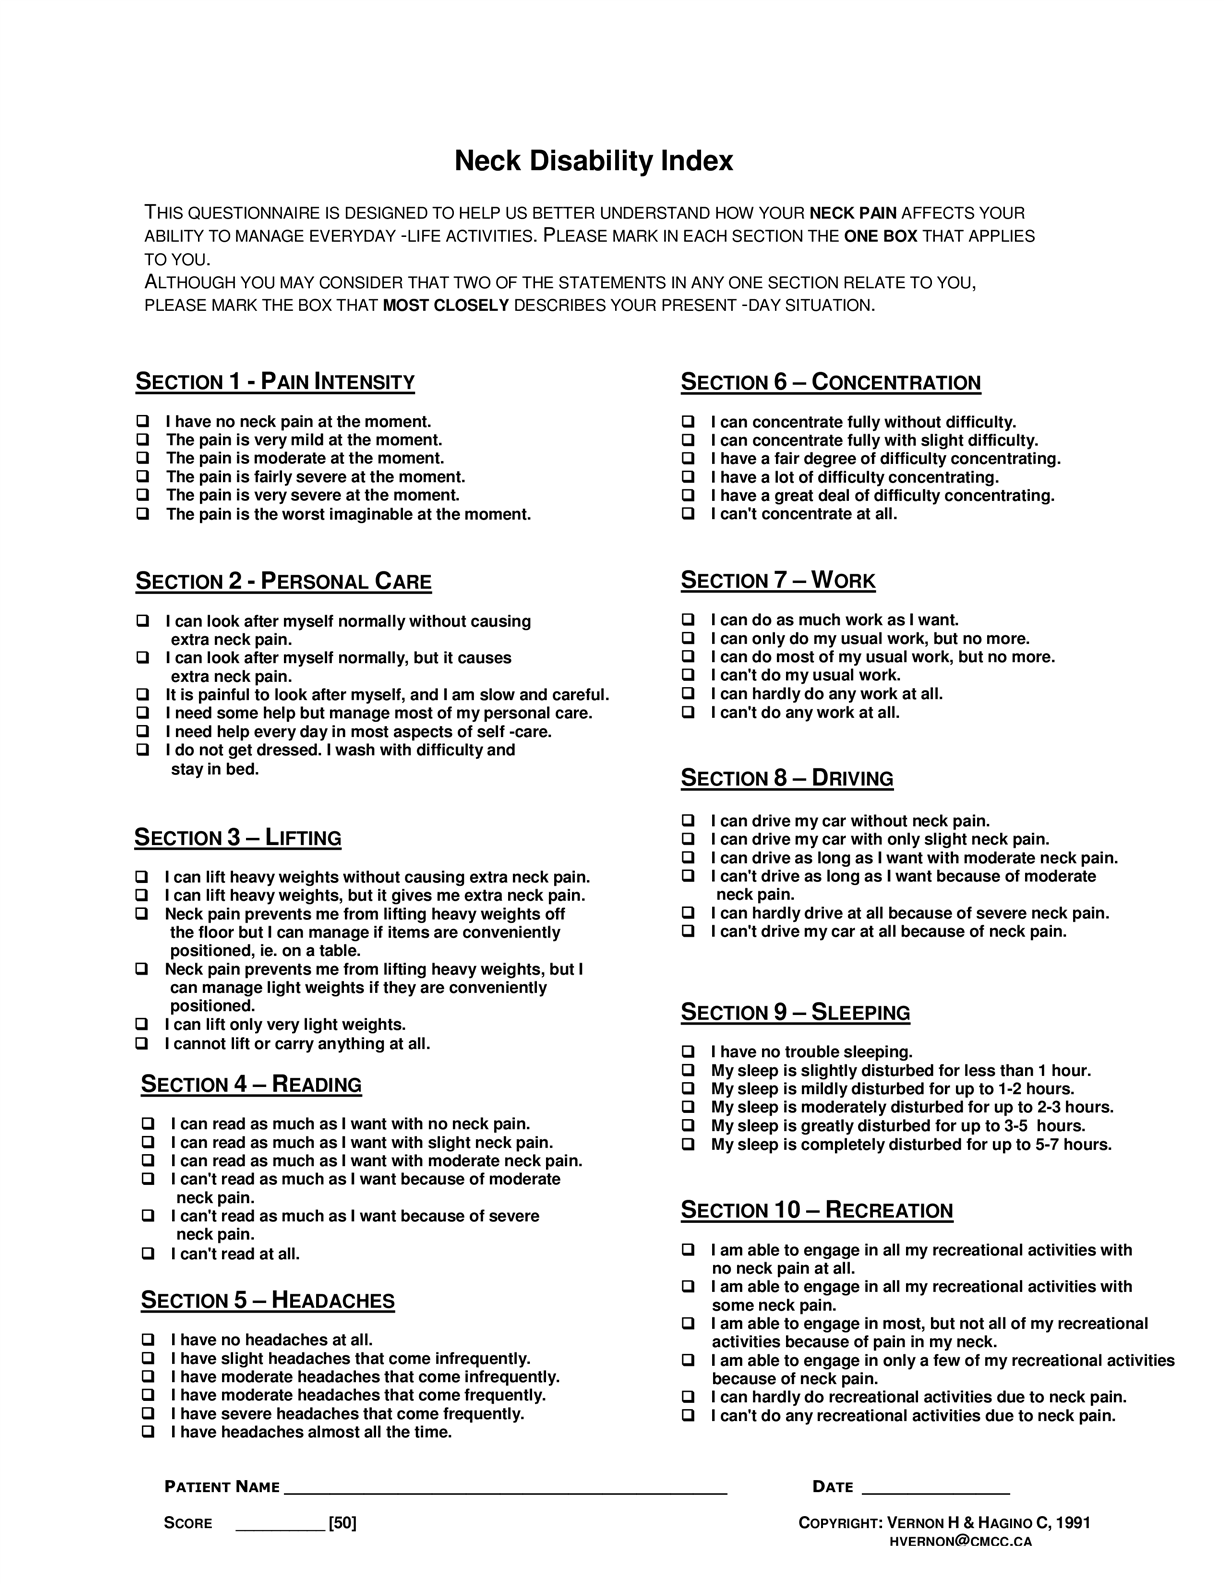

In [60]:
Image.open(imgpath)

In [107]:
# contours

In [10]:
img = cv2.drawContours(im, contours, -1, (0,255,0), 1)

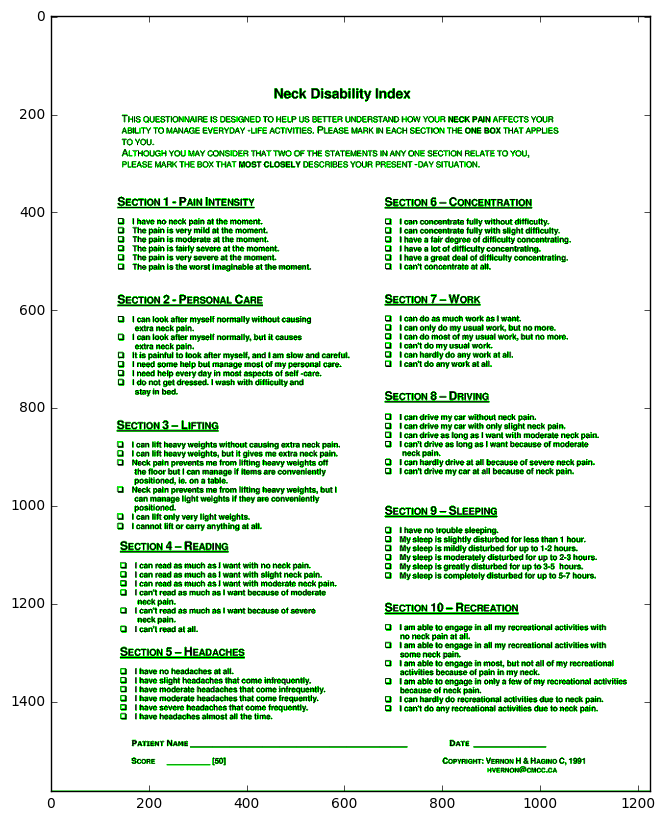

In [11]:
plt.figure(figsize = (20, 10))
plt.imshow(img)

In [12]:
pyt_string = pyt.image_to_string(Image.open(imgpath), boxes=True)
pyt_string_split = pyt_string.split('\n')
pyt_string_split2 = [split.split() for split in pyt_string_split]

In [13]:
print pyt_string_split2[0]
print pyt_string_split2[0][1:3]
print pyt_string_split2[0][2:4]
print pyt_string_split2[0][3:5]

['N', '456', '1414', '473', '1434', '0']
['456', '1414']
['1414', '473']
['473', '1434']


* TODO: figure out what's going on with the boxes in pytesseract
* TODO: remove all character contours using coordinates from pytesseract
* TODO: remove contours that have contours inside them
* TODO: add ":" and "?" logic

In [108]:
class Image_Data:
    def __init__(self, imgpath):
        self.img_pil = Image.open(imgpath)
        self.img = cv2.imread(imgpath)
        self.imgray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        # ret, thresh = cv2.threshold(self.imgray, 127, 255, 0)
        # image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        self.width, self.height, self.channels = self.img.shape
        pyt_string = pyt.image_to_string(self.img_pil, boxes=True)
        pyt_string_split = pyt_string.split('\n')
        self.string_split = [split.split() for split in pyt_string_split]

    def get_char_arrays(self):
        char_dict = {}
        for char_split in self.string_split:
            char_id = char_split[0]
            char_split_w = int(char_split[1])
            char_split_s = height - int(char_split[2])
            char_split_e = int(char_split[3])
            char_split_n = height - int(char_split[4])
            
            char_boundaries = [np.array([[[char_split_n, char_split_w]],[[char_split_n, char_split_e]],
                                         [[char_split_s, char_split_e]],[[char_split_s, char_split_w]]])]
            if char_id in char_dict:
                char_dict[char_id].append(char_boundaries)
            else:
                char_dict[char_id] = char_boundaries
        return char_dict

In [109]:
test = Image_Data(imgpath)

In [110]:
char_dict = test.get_char_arrays()

In [111]:
char_dict['N']

[array([[[150, 456]],
 
        [[150, 473]],
 
        [[170, 473]],
 
        [[170, 456]]]), [array([[[207, 261]],
  
         [[207, 270]],
  
         [[219, 270]],
  
         [[219, 261]]])], [array([[[207, 273]],
  
         [[207, 282]],
  
         [[219, 282]],
  
         [[219, 273]]])], [array([[[207, 395]],
  
         [[207, 404]],
  
         [[219, 404]],
  
         [[219, 395]]])], [array([[[207, 612]],
  
         [[207, 622]],
  
         [[219, 622]],
  
         [[219, 612]]])], [array([[[207, 688]],
  
         [[207, 698]],
  
         [[219, 698]],
  
         [[219, 688]]])], [array([[[207, 811]],
  
         [[207, 820]],
  
         [[219, 820]],
  
         [[219, 811]]])], [array([[[207, 871]],
  
         [[207, 884]],
  
         [[219, 884]],
  
         [[219, 871]]])], [array([[[207, 886]],
  
         [[207, 896]],
  
         [[219, 896]],
  
         [[219, 886]]])], [array([[[230, 260]],
  
         [[230, 270]],
  
         [[242, 270]],
  
   